# Import Libraries

In [1]:
import functions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for statistical tests
from scipy.stats import ttest_rel, ttest_ind, wilcoxon
from statsmodels.stats.multitest import multipletests
#from scipy.stats import shapiro, wilcoxon, pearsonr, spearmanr

In [2]:
import importlib
importlib.reload(functions)

<module 'functions' from '/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py'>

# Loading the data

In [6]:
excel_folder_path = "data/"
FM_folder_path = "data/Raw_MissingDataImputed/"
regression_info, rsfMRI_full_info = functions.load_excel_data(excel_folder_path, FM_folder_path)
folder_path = "FC_matrices_times_wp11/"

rois = [363, 364, 365, 368, 372, 373, 374, 377, 379, 361, 370, 362, 371, 12, 54, 56, 78, 96, 192, 234, 236, 258, 276, 8, 9, 51, 52, 53, 188, 189, 231, 232, 233]
rois = [roi - 1 for roi in rois]
rois_sub = rois
rois_full = np.arange(0, 379)
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

Trying to load: TiMeS_matrix_mdImputed_allT4.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT4.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT3.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT3.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT2.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT2.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT1.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT1.xlsx


In [4]:
# Folder containing the data
folder_path = "FC_matrices_times_wp11/"

#t1_matrices, t1_subjects, yeo_mat_t1_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_only')
all_matrices, all_subjects, yeo_mat_all_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='all', plot=False)
#t1_t3_matched, t1_t3_subjects, yeo_mat_t1_t3_matched_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_t3_matched')
#t1_t4_matched, t1_t4_subjects, yeo_mat_t1_t4_matched_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_t4_matched')
#t1_t3_matrices, t1_t3_subjects, yeo_mat_t1_t3_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_t3')
#t1_t4_matrices, t1_t4_subject, yeo_mat_t1_t4_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_t4')
#matrices = functions.matrices_to_wide_df(matrices)
t1_t3_t4_matched = all_matrices.copy().dropna(subset=['T1_matrix', 'T3_matrix', 'T4_matrix'])

# Beginning

## T1_T3_T4 matched

=> means I use ttest_rel!!

Shape of T1 matrices: (26, 33, 33)
Shape of T3 matrices: (26, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7718: RuntimeWarning: invalid value encountered in subtract
  d = (a - b).astype(np.float64)
100%|██████████| 33/33 [00:01<00:00, 17.18it/s]


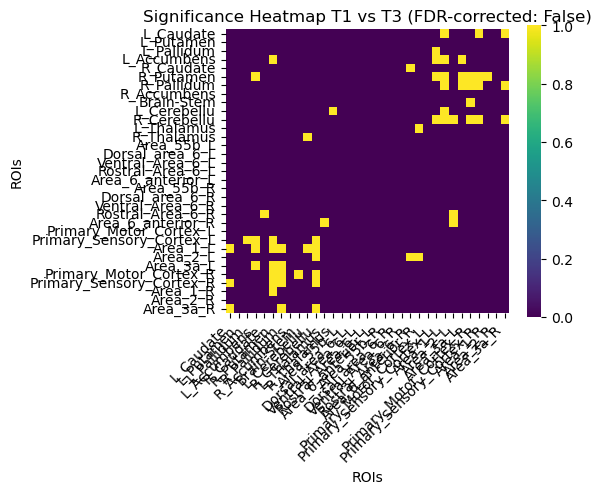

ROI_1                     ROI_2  \
0     R_Caudate          Rostral_Area_6_R   
1   L_Accumbens                 Area_3a_L   
2   L_Accumbens  Primary_Sensory_Cortex_L   
3   L_Accumbens                  Area_1_L   
4     L_Caudate  Primary_Sensory_Cortex_R   
5     R_Putamen                 Area_3a_L   
6    R_Pallidum  Primary_Sensory_Cortex_R   
7    R_Pallidum                 Area_3a_R   
8     R_Putamen  Primary_Sensory_Cortex_R   
9     R_Putamen    Primary_Motor_Cortex_R   
10   R_Pallidum                 Area_3a_L   
11    R_Putamen  Primary_Sensory_Cortex_L   
12   R_Pallidum                  Area_1_L   
13   L_Pallidum  Primary_Sensory_Cortex_L   
14    L_Caudate                  Area_1_L   
15    R_Putamen                  Area_1_L   
16    R_Putamen                  Area_1_R   
17  L_Accumbens                 R_Putamen   
18    L_Caudate                 Area_3a_R   
19   R_Pallidum    Primary_Motor_Cortex_R   

                                Comparison   p_value  
0             R_Caudate - Rostral_Area_6_R  0.001037  
1                  L_Accumbens - Area_3a_L  0.001270  
2   L_Accumbens - Primary_Sensory_Cortex_L  0.001690  
3                   L_Accumbens - Area_1_L  0.004079  
4     L_Caudate - Primary_Sensory_Cortex_R  0.007746  
5                    R_Putamen - Area_3a_L  0.009094  
6    R_Pallidum - Primary_Sensory_Cortex_R  0.015155  
7                   R_Pallidum - Area_3a_R  0.016417  
8     R_Putamen - Primary_Sensory_Cortex_R  0.016800  
9       R_Putamen - Primary_Motor_Cortex_R  0.018401  
10                  R_Pallidum - Area_3a_L  0.018632  
11    R_Putamen - Primary_Sensory_Cortex_L  0.021476  
12                   R_Pallidum - Area_1_L  0.022450  
13   L_Pallidum - Primary_Sensory_Cortex_L  0.024463  
14                    L_Caudate - Area_1_L  0.026845  
15                    R_Putamen - Area_1_L  0.031897  
16                    R_Putamen - Area_1_R  0.034637  
17                 L_Accumbens - R_Putamen  0.037672  
18                   L_Caudate - Area_3a_R  0.040055  
19     R_Pallidum - Primary_Motor_Cortex_R  0.042456

Shape of T1 matrices: (26, 33, 33)
Shape of T4 matrices: (26, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7718: RuntimeWarning: invalid value encountered in subtract
  d = (a - b).astype(np.float64)
100%|██████████| 33/33 [00:01<00:00, 21.43it/s]


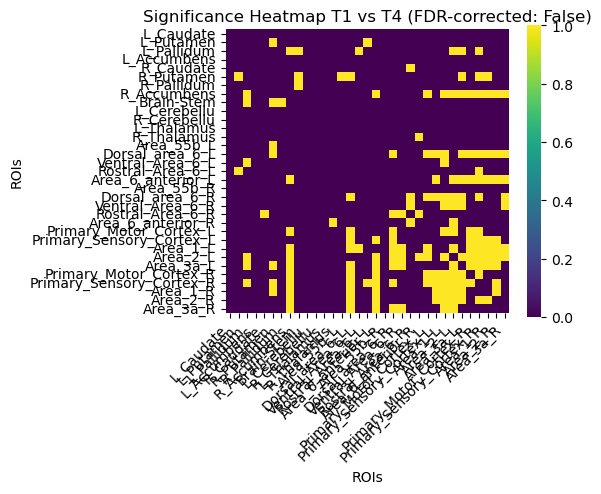

ROI_1                     ROI_2  \
0     R_Caudate          Rostral_Area_6_R   
1     R_Putamen                Brain-Stem   
2   R_Accumbens                 Area_3a_L   
3   R_Accumbens                  Area_2_R   
4     R_Putamen                 Area_3a_L   
5    L_Pallidum  Primary_Sensory_Cortex_R   
6    L_Pallidum                Brain-Stem   
7   R_Accumbens                 Area_3a_R   
8    L_Pallidum               R_Accumbens   
9     R_Putamen                  Area_1_R   
10  R_Accumbens         Area_6_anterior_L   
11    R_Putamen  Primary_Sensory_Cortex_R   
12    L_Putamen          Rostral_Area_6_L   
13  R_Accumbens                  Area_1_L   
14   L_Pallidum                  Area_2_L   
15  R_Accumbens                  Area_1_R   
16   L_Pallidum          Ventral_Area_6_L   
17   L_Pallidum                 Area_3a_L   
18  R_Accumbens  Primary_Sensory_Cortex_R   
19  R_Accumbens                  Area_2_L   
20    R_Putamen           Dorsal_area_6_L   
21  R_Accumbens    Primary_Motor_Cortex_R   
22    L_Putamen                 R_Putamen   
23    R_Putamen                Area_55b_L   
24  R_Accumbens    Primary_Motor_Cortex_L   
25   R_Pallidum                Brain-Stem   

                                Comparison   p_value  
0             R_Caudate - Rostral_Area_6_R  0.001246  
1                   R_Putamen - Brain-Stem  0.003184  
2                  R_Accumbens - Area_3a_L  0.004877  
3                   R_Accumbens - Area_2_R  0.005226  
4                    R_Putamen - Area_3a_L  0.007014  
5    L_Pallidum - Primary_Sensory_Cortex_R  0.011675  
6                  L_Pallidum - Brain-Stem  0.019710  
7                  R_Accumbens - Area_3a_R  0.020379  
8                 L_Pallidum - R_Accumbens  0.024130  
9                     R_Putamen - Area_1_R  0.026833  
10         R_Accumbens - Area_6_anterior_L  0.027480  
11    R_Putamen - Primary_Sensory_Cortex_R  0.032528  
12            L_Putamen - Rostral_Area_6_L  0.034759  
13                  R_Accumbens - Area_1_L  0.035342  
14                   L_Pallidum - Area_2_L  0.036704  
15                  R_Accumbens - Area_1_R  0.038109  
16           L_Pallidum - Ventral_Area_6_L  0.039378  
17                  L_Pallidum - Area_3a_L  0.039779  
18  R_Accumbens - Primary_Sensory_Cortex_R  0.040079  
19                  R_Accumbens - Area_2_L  0.041604  
20             R_Putamen - Dorsal_area_6_L  0.041639  
21    R_Accumbens - Primary_Motor_Cortex_R  0.041913  
22                   L_Putamen - R_Putamen  0.042106  
23                  R_Putamen - Area_55b_L  0.042224  
24    R_Accumbens - Primary_Motor_Cortex_L  0.046784  
25                 R_Pallidum - Brain-Stem  0.049192

In [5]:
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path
roi_labels = [roi_mapping[i] for i in rois]

sig_df_t3, pval_df_t3, reject_df_t3 = functions.get_sig_matrix(
    t1_t3_t4_matched,
    tp=3,
    correction=False,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    selected_rois=rois,
    roi_mapping=roi_mapping,
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels, filter_striatum=True)
display(summary_df_t3)

sig_df_t4, pval_df_t4, reject_df_t4 = functions.get_sig_matrix(
    t1_t3_t4_matched,
    tp=4,
    correction=False,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    selected_rois=rois,
    roi_mapping=roi_mapping,
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels, filter_striatum=True)
display(summary_df_t4)

## Now contra vs ipsi (correct way to call functions)

100%|██████████| 32/32 [00:01<00:00, 17.70it/s]


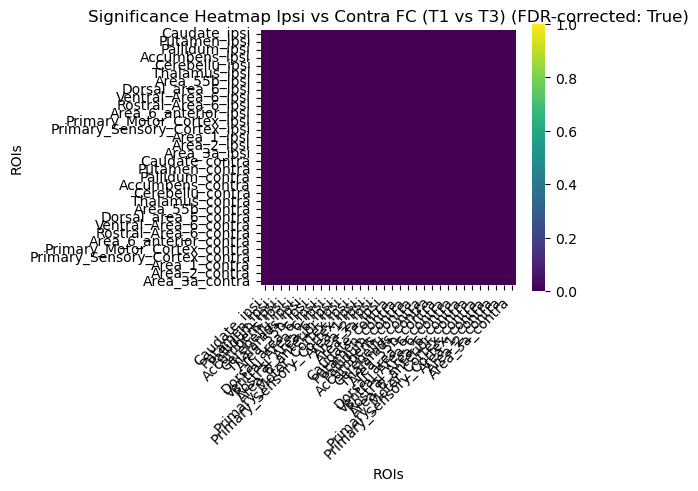

100%|██████████| 32/32 [00:01<00:00, 18.69it/s]


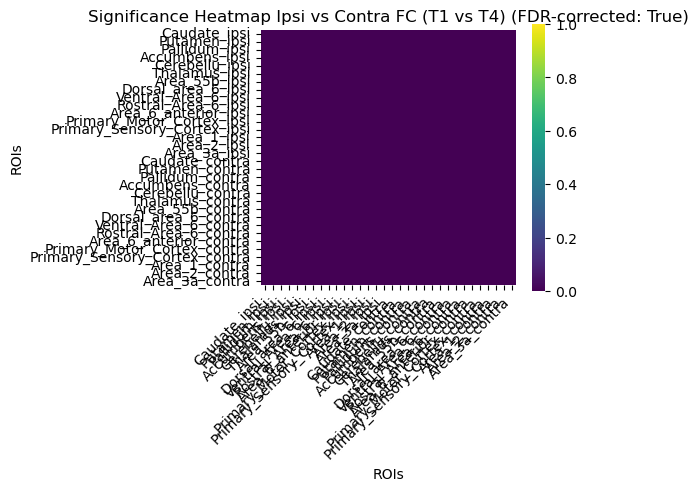

                               Caudate_ipsi  Putamen_ipsi  Pallidum_ipsi  \
Caudate_ipsi                            NaN      0.904421       0.843569   
Putamen_ipsi                       0.904421           NaN       0.904421   
Pallidum_ipsi                      0.843569      0.904421            NaN   
Accumbens_ipsi                     0.865909      0.506392       0.442048   
Cerebellu_ipsi                     0.904421      0.442048       0.869851   
Thalamus_ipsi                      0.986402      0.845702       0.920808   
Area_55b_ipsi                      0.616211      0.735487       0.904421   
Dorsal_area_6_ipsi                 0.988687      0.918010       0.557806   
Ventral_Area_6_ipsi                0.906396      0.688455       0.627637   
Rostral_Area_6_ipsi                0.290404      0.875542       0.904421   
Area_6_anterior_ipsi               0.988687      0.904421       0.959961   
Primary_Motor_Cortex_ipsi          0.906396      0.843569       0.843569   
Primary_Sens

In [6]:
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3, labels_t3 = functions.get_sig_matrix(
    t1_t3_t4_matched,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4, labels_t4 = functions.get_sig_matrix(
    t1_t3_t4_matched,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)
print(pval_df_t4)

## Now contra/ipsi, split L and R

NB: When splitting, use wilcoxon !!

In [7]:
df_L, df_R = functions.split_by_lesion_side(t1_t3_t4_matched)
print(f"{len(df_L)} left-lesioned subjects")
print(f"{len(df_R)} right-lesioned subjects")

8 left-lesioned subjects
17 right-lesioned subjects


### L

100%|██████████| 32/32 [00:00<00:00, 36.25it/s]


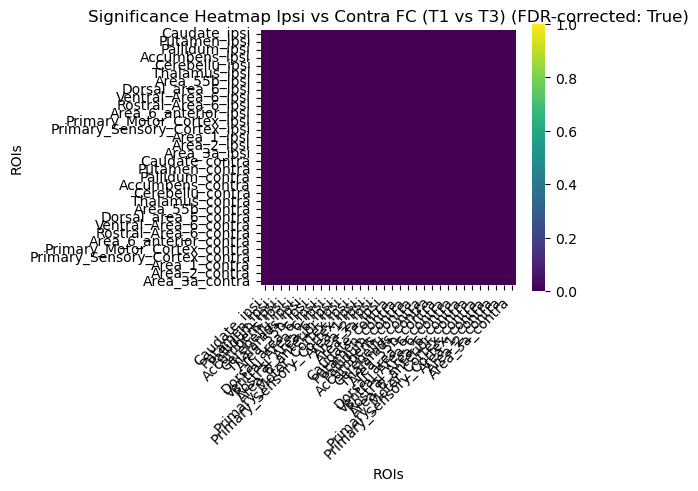

100%|██████████| 32/32 [00:00<00:00, 34.96it/s]


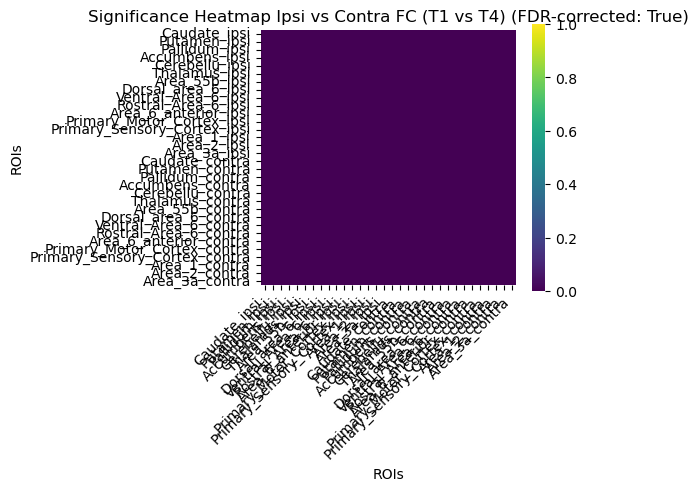

                               Caudate_ipsi  Putamen_ipsi  Pallidum_ipsi  \
Caudate_ipsi                            NaN      0.750969       0.807292   
Putamen_ipsi                       0.750969           NaN       1.000000   
Pallidum_ipsi                      0.807292      1.000000            NaN   
Accumbens_ipsi                     0.942878      0.961162       0.966513   
Cerebellu_ipsi                     0.910235      0.723333       0.993379   
Thalamus_ipsi                      0.779874      0.779874       0.942878   
Area_55b_ipsi                      1.000000      0.966513       0.942878   
Dorsal_area_6_ipsi                 0.723333      0.723333       0.750969   
Ventral_Area_6_ipsi                1.000000      0.910235       0.723333   
Rostral_Area_6_ipsi                0.961162      0.807292       0.961162   
Area_6_anterior_ipsi               0.993379      0.818427       0.723333   
Primary_Motor_Cortex_ipsi          0.966513      0.779874       0.961162   
Primary_Sens

In [8]:
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3, labels_t3 = functions.get_sig_matrix(
    df_L,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
    test = 'wilcoxon'
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4, labels_t4 = functions.get_sig_matrix(
    df_L,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
    test = 'wilcoxon'
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)
print(pval_df_t4)

### R

100%|██████████| 32/32 [00:01<00:00, 24.94it/s]


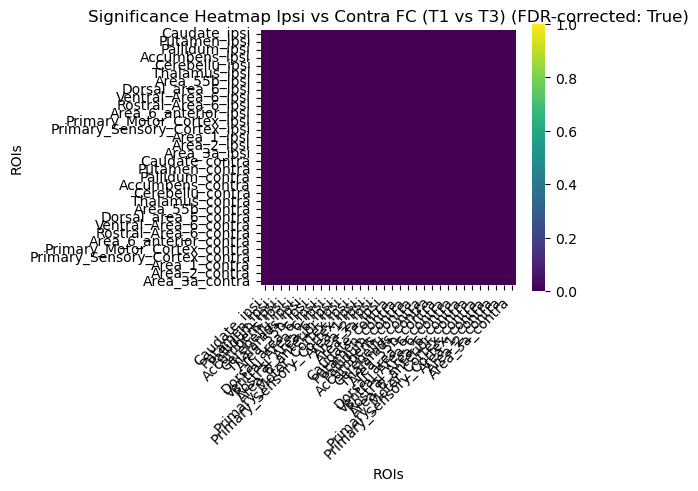

100%|██████████| 32/32 [00:01<00:00, 25.95it/s]


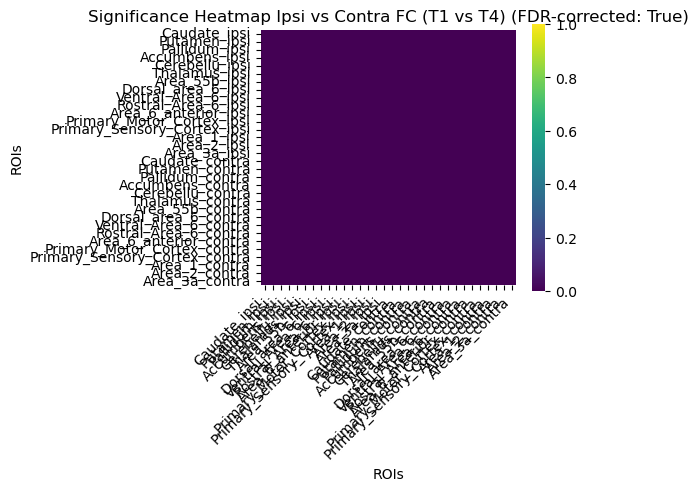

                               Caudate_ipsi  Putamen_ipsi  Pallidum_ipsi  \
Caudate_ipsi                            NaN      0.940023       0.964474   
Putamen_ipsi                       0.940023           NaN       0.889946   
Pallidum_ipsi                      0.964474      0.889946            NaN   
Accumbens_ipsi                     0.866475      0.410925       0.452264   
Cerebellu_ipsi                     0.968036      0.774451       0.878323   
Thalamus_ipsi                      0.905488      0.797874       0.993265   
Area_55b_ipsi                      0.848560      0.777561       0.925598   
Dorsal_area_6_ipsi                 0.777561      0.604410       0.866475   
Ventral_Area_6_ipsi                1.000000      0.604410       0.873452   
Rostral_Area_6_ipsi                0.410925      0.977768       0.925598   
Area_6_anterior_ipsi               0.905488      0.873452       0.797874   
Primary_Motor_Cortex_ipsi          1.000000      0.733326       0.889946   
Primary_Sens

In [9]:
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3, labels_t3 = functions.get_sig_matrix(
    df_R,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
    test = 'wilcoxon'
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4, labels_t4 = functions.get_sig_matrix(
    df_R,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
    test = 'wilcoxon'
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)
print(pval_df_t4)

## For yeo

### Unmatched

In [10]:
import importlib
importlib.reload(functions)

<module 'functions' from '/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py'>

Shape of T1 matrices: (65, 8, 8)
Shape of T3 matrices: (44, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:6920: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7395: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2
100%|██████████| 8/8 [00:00<00:00, 30.96it/s]


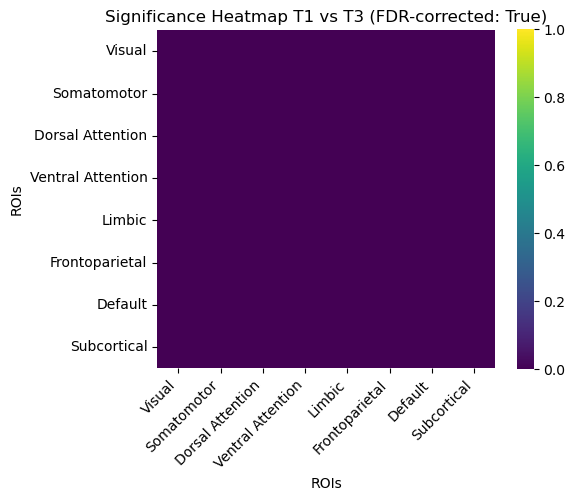

Shape of T1 matrices: (65, 8, 8)
Shape of T4 matrices: (41, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:6920: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7395: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2
100%|██████████| 8/8 [00:00<00:00, 54.39it/s]


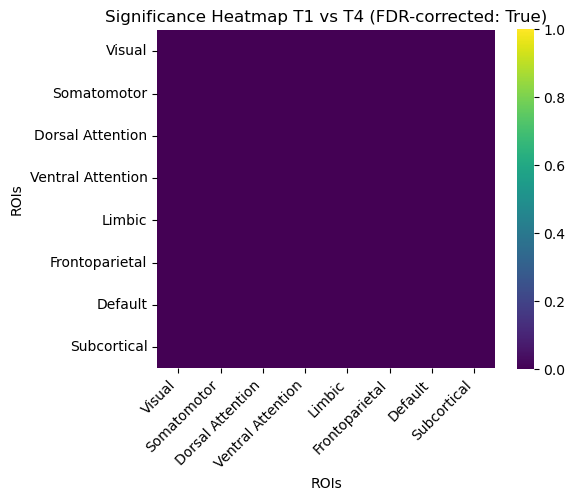

In [11]:
significant_matrix, p_vals_corrected, reject = functions.get_sig_matrix(yeo_mat_all_rois, correction=True, alpha=0.05, cluster=False)

summary = functions.summarize_significant_differences(
                p_vals_corrected,
                significant_matrix,
                roi_mapping_yeo,
                alpha=0.05
            )
#display(summary)

significant_matrix, p_vals_corrected, reject = functions.get_sig_matrix(yeo_mat_all_rois, tp=4,correction=True, alpha=0.05, cluster=False)

summary = functions.summarize_significant_differences(
                p_vals_corrected,
                significant_matrix,
                roi_mapping_yeo,
                alpha=0.05
            )
#display(summary)

### T3/T4 matched

Shape of T1 matrices: (26, 8, 8)
Shape of T3 matrices: (26, 8, 8)


python(31699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7718: RuntimeWarning: invalid value encountered in subtract
  d = (a - b).astype(np.float64)
100%|██████████| 8/8 [00:00<00:00, 32.27it/s]


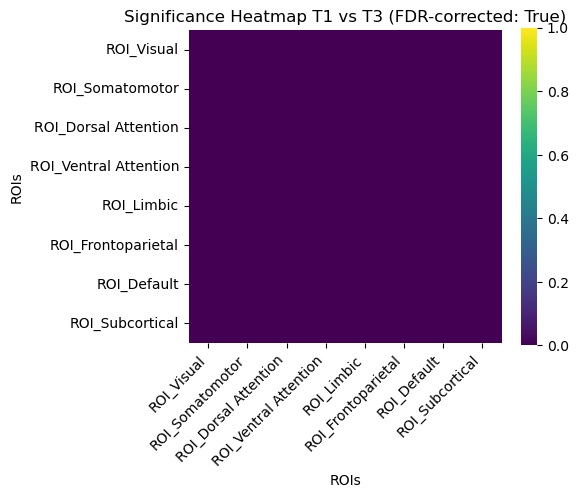

Empty DataFrame
Columns: [ROI_1, ROI_2, Comparison, p_value, effect_size]
Index: []

subject_id                                          T1_matrix  \
2        s031                       Visual  Somatomotor  Dors...   
4        s036                       Visual  Somatomotor  Dors...   
6        s065                       Visual  Somatomotor  Dors...   
8        s008                       Visual  Somatomotor  Dors...   
11       s039                       Visual  Somatomotor  Dors...   
12       s006                       Visual  Somatomotor  Dors...   
13       s001                       Visual  Somatomotor  Dors...   
14       s055                       Visual  Somatomotor  Dors...   
17       s041                       Visual  Somatomotor  Dors...   
34       s014                       Visual  Somatomotor  Dors...   
35       s013                       Visual  Somatomotor  Dors...   
40       s057                       Visual  Somatomotor  Dors...   
41       s068                       Visual  Somatomotor  Dors...   
42       s050                       Visual  Somatomotor  Dors...   
44       s003                       Visual  Somatomotor  Dors...   
50       s067                       Visual  Somatomotor  Dors...   
54       s027                       Visual  Somatomotor  Dors...   
56       s016                       Visual  Somatomotor  Dors...   
58       s011                       Visual  Somatomotor  Dors...   
60       s042                       Visual  Somatomotor  Dors...   
61       s074                       Visual  Somatomotor  Dors...   
65       s017                       Visual  Somatomotor  Dors...   
66       s021                       Visual  Somatomotor  Dors...   
68       s019                       Visual  Somatomotor  Dors...   
71       s081                       Visual  Somatomotor  Dors...   
72       s075                       Visual  Somatomotor  Dors...   

                                            T2_matrix  \
2                                                None   
4                        Visual  Somatomotor  Dors...   
6                                                None   
8                        Visual  Somatomotor  Dors...   
11                       Visual  Somatomotor  Dors...   
12                       Visual  Somatomotor  Dors...   
13                       Visual  Somatomotor  Dors...   
14                                               None   
17                       Visual  Somatomotor  Dors...   
34                       Visual  Somatomotor  Dors...   
35                       Visual  Somatomotor  Dors...   
40                       Visual  Somatomotor  Dors...   
41                       Visual  Somatomotor  Dors...   
42                                               None   
44                       Visual  Somatomotor  Dors...   
50                       Visual  Somatomotor  Dors...   
54                       Visual  Somatomotor  Dors...   
56                       Visual  Somatomotor  Dors...   
58                       Visual  Somatomotor  Dors...   
60                       Visual  Somatomotor  Dors...   
61                       Visual  Somatomotor  Dors...   
65                       Visual  Somatomotor  Dors...   
66                       Visual  Somatomotor  Dors...   
68                       Visual  Somatomotor  Dors...   
71                       Visual  Somatomotor  Dors...   
72                       Visual  Somatomotor  Dors...   

                                            T3_matrix  \
2                        Visual  Somatomotor  Dors...   
4                        Visual  Somatomotor  Dors...   
6                        Visual  Somatomotor  Dors...   
8                        Visual  Somatomotor  Dors...   
11                       Visual  Somatomotor  Dors...   
12                       Visual  Somatomotor  Dors...   
13                       Visual  Somatomotor  Dors...   
14                       Visual  Somatomotor  Dors...   
17                       Visual  Somatomotor  Dors...   
34                       Visual  Somatomotor  Dors...   

In [47]:

yeo_t3_t4_matched = yeo_mat_all_rois.copy().dropna(subset=['T1_matrix', 'T3_matrix', 'T4_matrix'])

roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df, pval_df, reject_df = functions.get_sig_matrix(
    yeo_t3_t4_matched,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    selected_rois=rois,
    roi_mapping=roi_mapping_yeo
)

summary_df = functions.summarize_significant_differences(pval_df, sig_df, roi_labels=roi_mapping_yeo, filter_striatum=False)
display(summary_df)
yeo_t3_t4_matched

### L/R Split (L)

In [13]:
# A NE RUN QU'UNE FOIS

# Merge 'Lesion_side' from all_matrices into yeo_t3_t4_matched based on 'subject_id'
yeo_t3_t4_matched = yeo_t3_t4_matched.merge(
    all_matrices[['subject_id', 'Lesion_side']],
    on='subject_id',
    how='left'
)

yeo_L, yeo_R = functions.split_by_lesion_side(yeo_t3_t4_matched)
print(f"{len(df_L)} left-lesioned subjects")
print(f"{len(df_R)} right-lesioned subjects")

8 left-lesioned subjects
17 right-lesioned subjects


Shape of T1 matrices: (8, 8, 8)
Shape of T3 matrices: (8, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
100%|██████████| 8/8 [00:00<00:00, 67.63it/s]


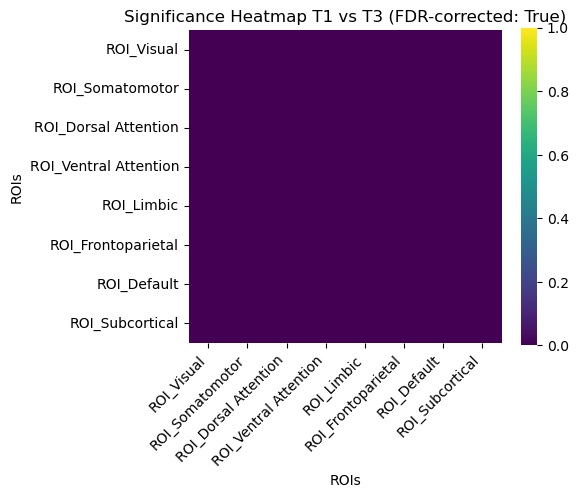

Shape of T1 matrices: (8, 8, 8)
Shape of T4 matrices: (8, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
100%|██████████| 8/8 [00:00<00:00, 129.15it/s]


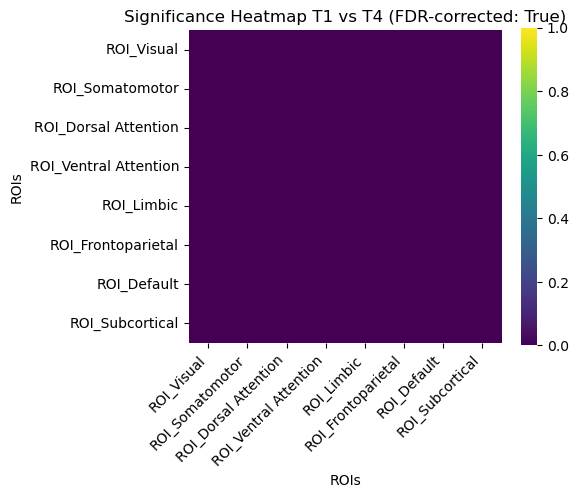

In [14]:
#roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3 = functions.get_sig_matrix(
    yeo_L,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    roi_mapping=roi_mapping_yeo,
    test = 'wilcoxon'
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4 = functions.get_sig_matrix(
    yeo_L,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    roi_mapping=roi_mapping_yeo,
    test = 'wilcoxon'
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)

### L/R Split (R)

Shape of T1 matrices: (17, 8, 8)
Shape of T3 matrices: (17, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
100%|██████████| 8/8 [00:00<00:00, 63.83it/s]


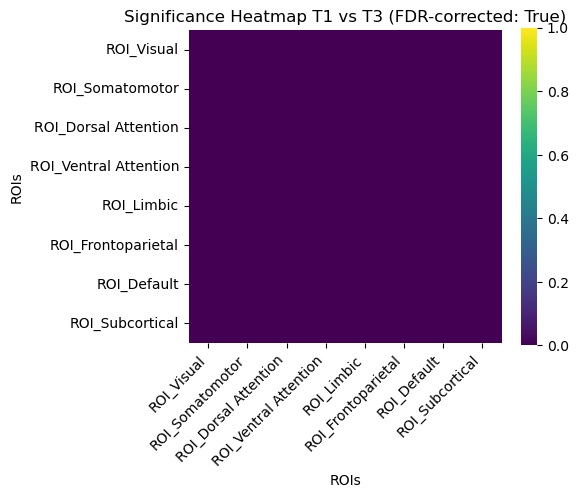

Shape of T1 matrices: (17, 8, 8)
Shape of T4 matrices: (17, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
100%|██████████| 8/8 [00:00<00:00, 97.88it/s]


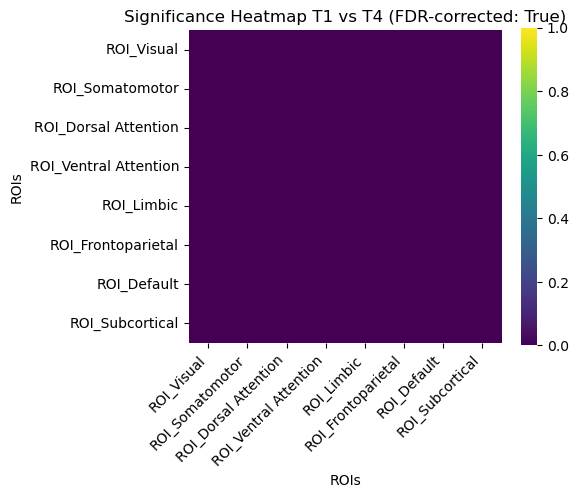

In [15]:
#roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3 = functions.get_sig_matrix(
    yeo_R,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    roi_mapping=roi_mapping_yeo,
    test = 'wilcoxon'
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4 = functions.get_sig_matrix(
    yeo_R,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    roi_mapping=roi_mapping_yeo,
    test = 'wilcoxon'
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)


# Homotopy

In [ ]:
homotopic_pairs = [(363, 372), (364, 373), (365, 374), (368, 377), (361, 370), (362, 371), (12, 192), (54, 234), (56, 236), (78, 258), (96, 276), (8, 188), (9, 189), (51, 231), (52, 232), (53, 233)]
homotopic_pairs = [(roi[0] - 1, roi[1] - 1) for roi in homotopic_pairs]  # Adjust for zero-based indexing

homotopic_t1_t3_t4_matched = t1_t3_t4_matched.copy()

Index([362, 363, 364, 367, 371, 372, 373, 376, 378, 360, 369, 361, 370,  11,
        53,  55,  77,  95, 191, 233, 235, 257, 275,   7,   8,  50,  51,  52,
       187, 188, 230, 231, 232],
      dtype='int64')


362       363       364       367       371       372       373  \
362       inf  0.737308  0.069059  0.023756  0.223254 -0.174484  0.123761   
363  0.737308       inf  0.149802  0.318908  0.261151 -0.026902  0.237957   
364  0.069059  0.149802       inf  0.174715  0.098503  0.673157  0.432611   
367  0.023756  0.318908  0.174715       inf  0.130740  0.096555  0.051929   
371  0.223254  0.261151  0.098503  0.130740       inf  0.167032  0.363247   
372 -0.174484 -0.026902  0.673157  0.096555  0.167032       inf  0.602377   
373  0.123761  0.237957  0.432611  0.051929  0.363247  0.602377       inf   
376 -0.092275  0.061562  0.095330  0.274216  0.029619  0.070757 -0.215087   
378  0.080014  0.046473 -0.059285  0.139529  0.031537  0.046736  0.000843   
360  0.266513  0.128582  0.521544  0.068532  0.027682  0.181036  0.140991   
369  0.554573  0.319382  0.363114  0.170114  0.204897  0.168004  0.163402   
361  0.523806  0.281197  0.465938  0.126192  0.128356  0.204162  0.168384   
370  0.850674  0.305679 -0.163853 -0.203825  0.316649 -0.233976  0.106032   
11   0.173872  0.074052 -0.094483 -0.053292  0.190272 -0.011832  0.039735   
53   0.101413 -0.055918 -0.231242 -0.190723  0.189261 -0.070961 -0.033738   
55   0.212841 -0.032713 -0.340789 -0.195080  0.069883 -0.251979 -0.111240   
77   0.251018  0.058653 -0.183834 -0.213304  0.169676 -0.261226 -0.026539   
95   0.151943  0.186602  0.389486  0.100282  0.026535  0.261066  0.163414   
191 -0.018252 -0.009309 -0.302046 -0.125243 -0.081274 -0.217149 -0.355807   
233  0.000796 -0.012564 -0.430691 -0.247412  0.168298 -0.269081 -0.056194   
235  0.243599 -0.009963 -0.536963 -0.337452  0.114988 -0.492988 -0.178632   
257  0.004930 -0.133612 -0.778503 -0.351641 -0.004223 -0.542228 -0.221691   
275  0.017107 -0.041286 -0.286648 -0.133559  0.149415 -0.135090 -0.131769   
7    0.103974 -0.094670 -0.046788 -0.207657  0.345359  0.020677  0.304365   
8    0.071040 -0.007234 -0.090558 -0.087506  0.365565 -0.006800  0.307929   
50  -0.173559 -0.062201 -0.028318 -0.054939  0.286357  0.046968  0.214171   
51  -0.057580 -0.050547 -0.212753 -0.234155  0.136653 -0.127328 -0.006865   
52  -0.006745  0.000309 -0.066519  0.008496  0.315726 -0.046939  0.180205   
187 -0.007600 -0.117947 -0.062222 -0.183174  0.347866  0.006899  0.294557   
188 -0.051433 -0.095736  0.045794 -0.196956  0.344514  0.064340  0.348778   
230 -0.110625 -0.090232 -0.096563 -0.137306  0.334192 -0.004359  0.215527   
231  0.101075 -0.037698 -0.293951 -0.164813  0.307308 -0.179525  0.087702   
232 -0.042384 -0.124044 -0.120947 -0.192262  0.301754 -0.049435  0.218383   

          376       378       360  ...       7         8         50   \
362 -0.092275  0.080014  0.266513  ...  0.103974  0.071040 -0.173559   
363  0.061562  0.046473  0.128582  ... -0.094670 -0.007234 -0.062201   
364  0.095330 -0.059285  0.521544  ... -0.046788 -0.090558 -0.028318   
367  0.274216  0.139529  0.068532  ... -0.207657 -0.087506 -0.054939   
371  0.029619  0.031537  0.027682  ...  0.345359  0.365565  0.286357   
372  0.070757  0.046736  0.181036  ...  0.020677 -0.006800  0.046968   
373 -0.215087  0.000843  0.140991  ...  0.304365  0.307929  0.214171   
376       inf  0.019244  0.154125  ... -0.465083 -0.489549 -0.338339   
378  0.019244       inf  0.019383  ... -0.138928 -0.066514 -0.246373   
360  0.154125  0.019383       inf  ... -0.080555 -0.132974 -0.220457   
369  0.293857  0.072567  0.371230  ... -0.025492 -0.092865 -0.263128   
361  0.245607  0.058908  0.494841  ... -0.104125 -0.149849 -0.229828   
370 -0.219244  0.094617  0.173433  ...  0.256853  0.279092 -0.043292   
11  -0.050442  0.093137  0.130348  ...  0.140010  0.197410  0.094915   
53  -0.103097 -0.191172 -0.010615  ...  0.261699  0.159614  0.104712   
55  -0.148757 -0.080252 -0.078500  ...  0.459560  0.426392  0.216847   
77  -0.344477 -0.206167 -0.186013  ...  0.545171  0.431060  0.356446   
95   0.214046 -0.013748  0.362935  ... -0.302832 -0.349234 -0.298090   
191  0.274607 -0.147365

In [ ]:
for fc in ['T1_matrix', 'T3_matrix', 'T4_matrix']:
    if fc in homotopic_t1_t3_t4_matched.columns:
        homotopic_t1_t3_t4_matched[fc] = homotopic_t1_t3_t4_matched[fc].apply(lambda mat: functions.compute_mean_homotopic_fc(mat, homotopic_pairs))



## No split

In [32]:
df_T1 = pd.DataFrame(homotopic_t1_t3_t4_matched['T1_matrix'])
df_T3 = pd.DataFrame(homotopic_t1_t3_t4_matched['T3_matrix'])
df_T4 = pd.DataFrame(homotopic_t1_t3_t4_matched['T4_matrix'])

shapiro_1 = functions.test_normality(df_T1)
shapiro_3 = functions.test_normality(df_T3)
shapiro_4 = functions.test_normality(df_T4)
display("Shapiro-Wilk test for T1:", shapiro_1)
display("Shapiro-Wilk test for T3:", shapiro_3)
display("Shapiro-Wilk test for T4:", shapiro_4)

'Shapiro-Wilk test for T1:'

Variable         W   p-value  Normal? (p > alpha)
0  T1_matrix  0.929577  0.075717                 True

'Shapiro-Wilk test for T3:'

Variable         W   p-value  Normal? (p > alpha)
0  T3_matrix  0.977138  0.808131                 True

'Shapiro-Wilk test for T4:'

Variable         W   p-value  Normal? (p > alpha)
0  T4_matrix  0.979197  0.856434                 True

In [35]:
t3_stat, t3_p = ttest_rel(homotopic_t1_t3_t4_matched['T1_matrix'], homotopic_t1_t3_t4_matched['T3_matrix'])
t4_stat, t4_p = ttest_rel(homotopic_t1_t3_t4_matched['T1_matrix'], homotopic_t1_t3_t4_matched['T4_matrix'])
t3_t4_stat, t3_t4_p = ttest_rel(df_T3['T3_matrix'], df_T4['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat:.3f}, p = {t3_p:.4f}")
print(f"T1 vs T4: t = {t4_stat:.3f}, p = {t4_p:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat:.3f}, p = {t3_t4_p:.4f}")

print("Mean difference T1-T3:", (homotopic_t1_t3_t4_matched['T1_matrix'] - homotopic_t1_t3_t4_matched['T3_matrix']).mean())
print("Mean difference T1-T4:", (homotopic_t1_t3_t4_matched['T1_matrix'] - homotopic_t1_t3_t4_matched['T4_matrix']).mean())
print("Mean difference T3-T4:", (homotopic_t1_t3_t4_matched['T3_matrix'] - homotopic_t1_t3_t4_matched['T4_matrix']).mean())

T1 vs T3: t = -1.045, p = 0.3061
T1 vs T4: t = -3.047, p = 0.0054
T4 vs T3: t = -1.645, p = 0.1125
Mean difference T1-T3: -0.03669358978006299
Mean difference T1-T4: -0.09128231091812675
Mean difference T3-T4: -0.05458872113806375


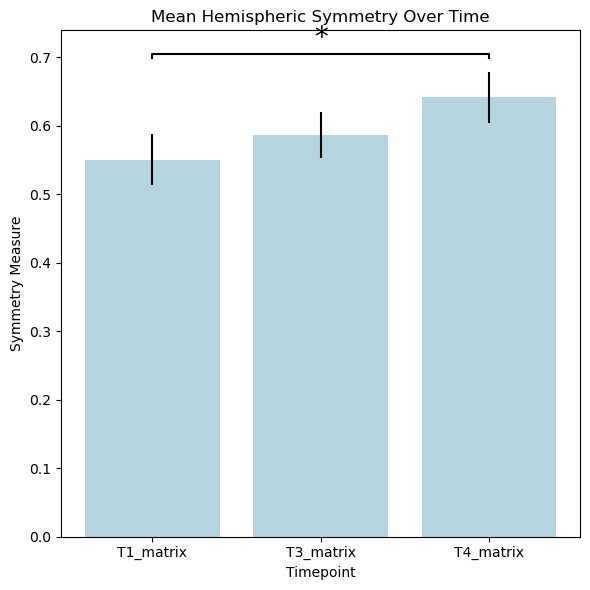

In [44]:
# Mean and standard error
homo_df = homotopic_t1_t3_t4_matched[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='lightblue')
plt.title('Mean Hemispheric Symmetry Over Time')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

## Split !

### L split

In [37]:
df_L, df_R = functions.split_by_lesion_side(homotopic_t1_t3_t4_matched)

t3_stat_L, t3_p_L = wilcoxon(df_L['T1_matrix'], df_L['T3_matrix'])
t4_stat_L, t4_p_L = wilcoxon(df_L['T1_matrix'], df_L['T4_matrix'])
t3_t4_stat_L, t3_t4_p_L = wilcoxon(df_L['T3_matrix'], df_L['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat_L:.3f}, p = {t3_p_L:.4f}")
print(f"T1 vs T4: t = {t4_stat_L:.3f}, p = {t4_p_L:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat_L:.3f}, p = {t3_t4_p_L:.4f}")

print("Mean difference T1-T3:", (df_L['T1_matrix'] - df_L['T3_matrix']).mean())
print("Mean difference T1-T4:", (df_L['T1_matrix'] - df_L['T4_matrix']).mean())
print("Mean difference T3-T4:", (df_L['T3_matrix'] - df_L['T4_matrix']).mean())

T1 vs T3: t = 17.000, p = 0.9453
T1 vs T4: t = 8.000, p = 0.1953
T4 vs T3: t = 12.000, p = 0.4609
Mean difference T1-T3: 0.010183388578690007
Mean difference T1-T4: -0.08957113734013736
Mean difference T3-T4: -0.09975452591882736


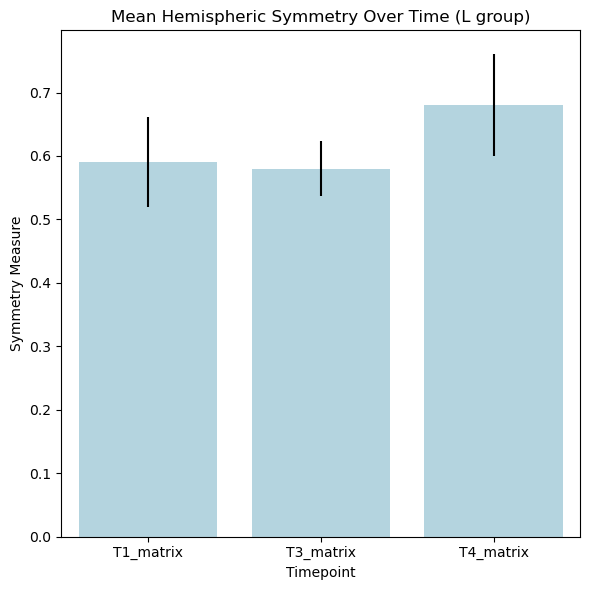

In [46]:
# Mean and standard error
homo_df = df_L[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='lightblue')
plt.title('Mean Hemispheric Symmetry Over Time (L group)')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

### R split

In [38]:
t3_stat_R, t3_p_R = wilcoxon(df_R['T1_matrix'], df_R['T3_matrix'])
t4_stat_R, t4_p_R = wilcoxon(df_R['T1_matrix'], df_R['T4_matrix'])
t3_t4_stat_R, t3_t4_p_R = wilcoxon(df_R['T3_matrix'], df_R['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat_R:.3f}, p = {t3_p_R:.4f}")
print(f"T1 vs T4: t = {t4_stat_R:.3f}, p = {t4_p_R:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat_R:.3f}, p = {t3_t4_p_R:.4f}")

print("Mean difference T1-T3:", (df_R['T1_matrix'] - df_R['T3_matrix']).mean())
print("Mean difference T1-T4:", (df_R['T1_matrix'] - df_R['T4_matrix']).mean())
print("Mean difference T3-T4:", (df_R['T3_matrix'] - df_R['T4_matrix']).mean())

T1 vs T3: t = 53.000, p = 0.2842
T1 vs T4: t = 26.000, p = 0.0150
T4 vs T3: t = 45.000, p = 0.1454
Mean difference T1-T3: -0.0627187594594209
Mean difference T1-T4: -0.10158119287433688
Mean difference T3-T4: -0.038862433414915985


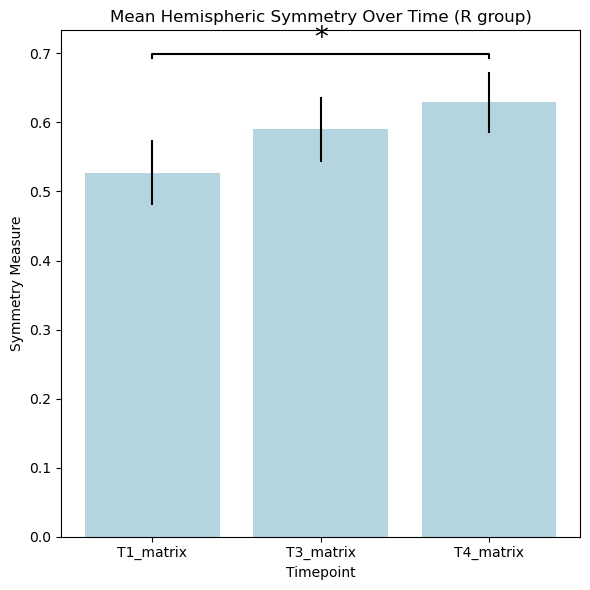

In [45]:
# Mean and standard error
homo_df = df_R[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='lightblue')
plt.title('Mean Hemispheric Symmetry Over Time (R group)')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()